## MBA em Ciência de Dados
# Redes Neurais e Arquiteturas Profundas

### <span style="color:darkred">Módulo VI - Redes neurais para dados sequenciais</span>


### <span style="color:darkred">Avaliação</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

As respostas devem ser dadas no Moodle, use esse notebook apenas para gerar o código necessário para obter as respostas

---

---

### Questão 1)

**Quais** dos cenários abaixo não necessitam de redes recorrentes que consideram a dependência sequencial dos dados?

 (a) Classificação de qualidade do ar usando série temporal multivariada a partir de sensores IoT<br>
<font color='red'> (b) Regressão do consumo de quilômetros por hora de automóveis fabricados no Brasil com base em suas características: fabricante, modelo, peso do veículo, número de litros do porta-malas e cavalos de potência.</font><br>
 (c) Tradução automática de uma sentença do Inglês para o Português<br>
 (d) Regressão a probabilidade de transbordamento de um rio com base em dados do nível do rio obtido por sensor e índices pluviométricos e metereológicos, todos adquiridos a cada 1 segundo.<br>

---

### Questão 2)

**Qual** o mecanismo pelo qual unidades recorrentes GRU e LSTM são capazes de considerar a sequência dos dados durante o aprendizado dos parâmetros do modelo?

(a) Mecanismo de atenção que realiza o produto interno entre os elementos de entrada utilizando uma janela definida pelo time step<br>
<font color='red'>(b) A saída do neurônio na iteração atual é combinada com a entrada da próxima iteração</font><br>
(c) Combinar as features de entrada multiplicando cada feature por um peso independente e passando essa combinação para o próximo neurônio<br>
(d) Armazenar em um histórico o valor de entrada em cada iteração $i$, combinando a entrada atual com a entrada na próxima iteração $i+1$<br>


### Questão 3)

O que significa o *time step* no projeto de uma rede neural recorrente?

<font color='red'>(a) Define as observações de entrada ao longo de uma sequência a serem processadas para produzir cada saída.</font><br>
(b) A taxa de amostragem dos dados de entrada da rede neural.<br>
(c) Parâmetro similar ao *stride* da unidade convolucional o que, na unidade recorrente, significa saltar um número de instâncias para computar a combinação linear das observações de entrada<br>
(d) Dimensão do tensor de entrada que indica a quantidade de *features* para cada observação na sequência.<br>

---
### Questão 4)

A abordagem word2vec gera um vetor numérico para cada palavra, permitindo processar texto com redes neurais. Essa abordagem, que utiliza como base a técnica de skipgrams, resulta em representações vetoriais cujo espaço de característica apresenta qual característica principal?

<font color='red'> (a) Palavras que aparecem em contextos similares estarão próximas no espaço de características</font><br>
 (b) Palavras que ocorrem com maior frequência no texto possuem maior importância na representação final<br>
 (c) Palavras estão organizadas no espaço de forma associada à classe do documento em que foram obtidas no conjunto de treinamento, ou seja, formam grupos com outras palavras de acordo com o rótulo do texto de origem.<br>
 (d) Palavras que aparecem em uma determinada ordem no texto estarão na mesma ordem em cada direção vetorial do espaço de características.<br>

Função custo (que se quer minimizar): é a probabilidade de uma palavra num certo contexto dado que uma palavra atual foi observada.

---

### Questão 5)

Carregue o word embedding `glove_s50` em Português do NILC, conforme visto em aula, e obtenha os word embeddings das palavras: 'objetivo', 'alvo', 'seta', 'flecha', 'arco', 'intuito', 'arma', 'tiro', 'vida', 'meta'

Produza uma projeção em 2 dimensões utilizando o PCA com random_state=0 e visualize os embeddings das palavras em um scatterplot. A seguir, utilize a distância Euclidiana para computar as palavras mais próximas da palavra 'objetivo' (excluindo a própria palavra) utilizando (1) o espaço Glove original de 50 dimensões e (2) o espaço reduzido pelo PCA com 2 dimensões. Quais são essas palavras, em ordem (iniciando pela menor distância)?

(a) Espaço 50-d: meta, alvo; Espaço 2-d: intuito, meta <br>
(b) Espaço 50-d: alvo, intuito; Espaço 2-d: alvo, tiro <br>
(c) Espaço 50-d: intuito, meta; Espaço 2-d: meta, intuito<br>
<font color='red'>(d) Espaço 50-d: intuito, alvo; Espaço 2-d: intuito, vida</font><br>

In [1]:
# 1- carregar glove
# descomente para baixar na primeira vez
# !wget http://143.107.183.175:22980/download.php?file=embeddings/glove/glove_s50.zip
# !mv download.php?file=embeddings%2Fglove%2Fglove_s50.zip glove_s50.zip
# !unzip -q glove_s50.zip

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from numpy.random import seed
from tensorflow.random import set_seed

In [3]:
# carregando o corpus 
# codigo colab
# path_to_glove_file = os.path.join(
#    os.path.expanduser("~"), "/content/drive/My Drive/Redes Neurais/data/glove_s50.txt" # colab
# )

# codigo execucao local
path_to_glove_file = "./glove_s50.txt"

embeddings_index = {}
with open(path_to_glove_file, encoding="utf-8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, dtype="f", sep=" ")  #dtype="i"
        embeddings_index[word] = coefs

print("Encontrados %s word vectors." % len(embeddings_index))

<ipython-input-3-5d0a3ea25b0e>:14: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  coefs = np.fromstring(coefs, dtype="f", sep=" ")  #dtype="i"


Encontrados 929594 word vectors.


In [4]:
# 2- obter embeddings com 50 dimensoes
# vetores das palavras
palavras = ['objetivo', 'alvo', 'seta', 'flecha', 'arco', 'intuito', 'arma', 'tiro', 'vida', 'meta']
for p in palavras:
    print('Palavra:',p,' Número de dimensões:', len(embeddings_index[p]), ' Embedding:')
    print(embeddings_index[p])

Palavra: objetivo  Número de dimensões: 50  Embedding:
[-4.430300e-01  1.716350e-01 -2.463840e-01 -2.641544e+00  2.250490e-01
  3.246830e-01  3.287290e-01 -6.142380e-01 -4.988900e-01  7.529980e-01
 -1.168290e-01 -2.720420e-01 -2.067800e-01  1.500030e-01  1.090113e+00
  2.306300e-02  5.446050e-01 -9.575190e-01  4.598050e-01  6.770410e-01
  1.226816e+00  6.690000e-04 -7.648420e-01 -9.252180e-01 -6.391950e-01
 -3.898280e-01  6.525890e-01 -9.826100e-02  1.354790e-01 -1.488090e-01
 -2.089010e-01  8.783570e-01  1.749910e-01  3.164350e-01  2.283010e-01
 -3.944960e-01 -4.159000e-01  1.357507e+00 -7.422000e-01  2.305630e-01
 -6.117030e-01  1.051915e+00  3.423940e-01 -2.573810e-01  1.023910e-01
 -4.521580e-01  1.207511e+00  7.137380e-01 -5.977760e-01 -4.656310e-01]
Palavra: alvo  Número de dimensões: 50  Embedding:
[ 0.056642  0.015544 -0.141454 -2.442725 -0.306541  0.312559 -0.720949
 -0.55864  -1.343847  0.492189  0.23534   0.590946 -0.467008 -0.179045
 -0.047504  0.383282 -0.095568 -0.46778  

In [5]:
vetor50d = []
palavras = ['objetivo', 'alvo', 'seta', 'flecha', 'arco', 'intuito', 'arma', 'tiro', 'vida', 'meta']
for p in palavras:
    vetor50d.append(embeddings_index[p])
vetor50d = np.array(vetor50d)
vetor50d.shape

(10, 50)

In [6]:
# 3- computar PCA e projetar em 2 dimensoes
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(vetor50d)
pca2d = pca.transform(vetor50d)
print('\tDados x features obtidas após PCA: ', pca2d.shape)


	Dados x features obtidas após PCA:  (10, 2)


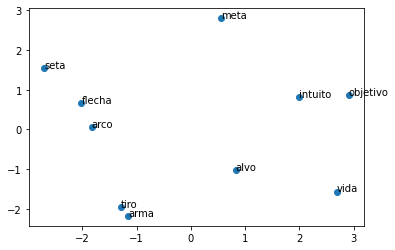

In [7]:
# 4- scatterplot dos dados em 2d num array pca2d
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
scatter = ax.scatter(pca2d[:,0], pca2d[:,1])

# exibe palavras ao lado dos pontos
# - a variavel palavras deve conter a lista de palavras
# - a variavel pca2d deve ser o array numpy contendo os dados projetados via PCA
for i, txt in enumerate(palavras):
    ax.annotate(txt, (pca2d[i,0], pca2d[i,1]))

In [8]:
# Palavra de referência: 'objetivo'
print(vetor50d[0])
print(pca2d[0])

[-4.430300e-01  1.716350e-01 -2.463840e-01 -2.641544e+00  2.250490e-01
  3.246830e-01  3.287290e-01 -6.142380e-01 -4.988900e-01  7.529980e-01
 -1.168290e-01 -2.720420e-01 -2.067800e-01  1.500030e-01  1.090113e+00
  2.306300e-02  5.446050e-01 -9.575190e-01  4.598050e-01  6.770410e-01
  1.226816e+00  6.690000e-04 -7.648420e-01 -9.252180e-01 -6.391950e-01
 -3.898280e-01  6.525890e-01 -9.826100e-02  1.354790e-01 -1.488090e-01
 -2.089010e-01  8.783570e-01  1.749910e-01  3.164350e-01  2.283010e-01
 -3.944960e-01 -4.159000e-01  1.357507e+00 -7.422000e-01  2.305630e-01
 -6.117030e-01  1.051915e+00  3.423940e-01 -2.573810e-01  1.023910e-01
 -4.521580e-01  1.207511e+00  7.137380e-01 -5.977760e-01 -4.656310e-01]
[2.9068394 0.854547 ]


In [9]:
# 5- calcular distancias euclidianas nos espacos 50d e 2d
dist_50d = []
dist_2d = []
from scipy.spatial import distance

for i in range(len(palavras)):
    a = vetor50d[0]
    b = vetor50d[i]
    dst = distance.euclidean(a, b)
    dist_50d.append(dst)
    a = pca2d[0]
    b = pca2d[i]
    dst = distance.euclidean(a, b)
    dist_2d.append(dst)
    
print('Distâncias 50d:',dist_50d)
print('Distâncias 2d:', dist_2d)
palavras    

Distâncias 50d: [0.0, 4.01945686340332, 6.287748336791992, 5.742746353149414, 5.812994480133057, 2.5110530853271484, 5.613966941833496, 5.518706321716309, 4.954581260681152, 4.436448097229004]
Distâncias 2d: [0.0, 2.802661418914795, 5.653047561645508, 4.930658340454102, 4.800335884094238, 0.9124592542648315, 5.068037033081055, 5.048439979553223, 2.430748462677002, 3.0456278324127197]


['objetivo',
 'alvo',
 'seta',
 'flecha',
 'arco',
 'intuito',
 'arma',
 'tiro',
 'vida',
 'meta']

In [10]:
# 6- obter e exibir palavras mais proximas
sorted_index_50d = np.argsort(dist_50d)
sorted_index_50d

array([0, 5, 1, 9, 8, 7, 6, 3, 4, 2], dtype=int64)

In [11]:
sorted_index_2d = np.argsort(dist_2d)
sorted_index_2d

array([0, 5, 8, 1, 9, 4, 3, 7, 6, 2], dtype=int64)

In [12]:
print('Menores distâncias 50d:', 
      dist_50d[sorted_index_50d[1]], dist_50d[sorted_index_50d[2]])
print('Palavras mais próximas 50d:', 
      palavras[sorted_index_50d[1]], palavras[sorted_index_50d[2]])

print('Menores distâncias 2d:', 
      dist_2d[sorted_index_2d[1]], dist_2d[sorted_index_2d[2]])
print('Palavras mais próximas 2d:', 
      palavras[sorted_index_2d[1]], palavras[sorted_index_2d[2]])


Menores distâncias 50d: 2.5110530853271484 4.01945686340332
Palavras mais próximas 50d: intuito alvo
Menores distâncias 2d: 0.9124592542648315 2.430748462677002
Palavras mais próximas 2d: intuito vida
